#### Importowanie bibliotek

In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [52]:
df = pd.read_csv("Metabolomics_Final_clean_filtered.csv")

In [53]:
df.shape

(105, 501)

#### Usunięcie blanków i QC

In [54]:
# Filter out Blank and QC samples
df = df[~df['Group'].isin(['Blank', 'QC'])]

In [55]:
df.shape

(81, 501)

#### Standaryzacja danych

In [56]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns (excluding 'Name' and 'Group')
numeric_columns = df.drop(['Name', 'Group'], axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify standardization
print("Mean of standardized features:")
print(df[numeric_columns].mean().mean())
print("\nStandard deviation of standardized features:")
print(df[numeric_columns].std().mean())

Mean of standardized features:
8.785398653373771e-18

Standard deviation of standardized features:
1.006230589874905


#### Analiza PCA

Variance explained by PC1: 18.43%
Variance explained by PC2: 11.40%
Total variance explained: 29.83%


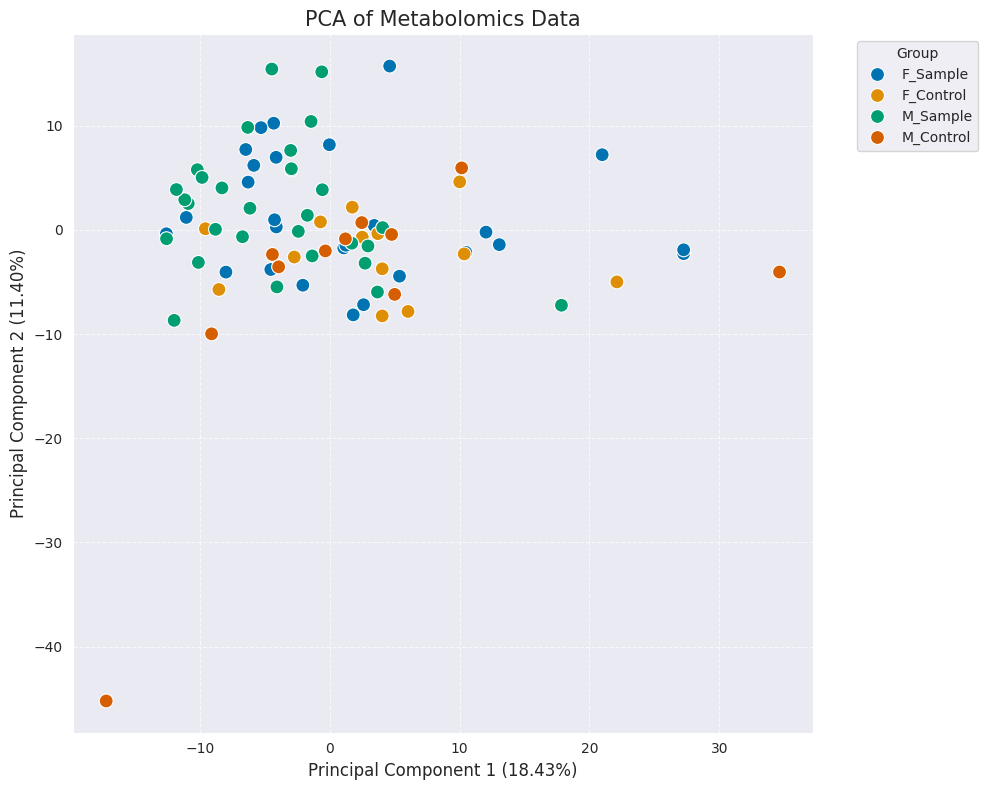

In [57]:
# Exclude non-numeric columns
X = df.drop(['Name', 'Group'], axis=1)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'Group' and 'Name' columns from the original dataframe
pca_df['Group'] = df['Group'].values
pca_df['Name'] = df['Name'].values

# Calculate variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='colorblind', s=100)

# Add a title and labels
plt.title('PCA of Metabolomics Data', fontsize=15)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%})', fontsize=12)

# Add a legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve the layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Wykres opisywanej wariancji przez 10 głównych składowych

PC1: 18.43%
PC2: 11.40%
PC3: 8.89%
PC4: 7.26%
PC5: 6.78%
PC6: 3.99%
PC7: 3.79%
PC8: 2.87%
PC9: 2.02%
PC10: 1.97%
Total variance explained: 67.40%


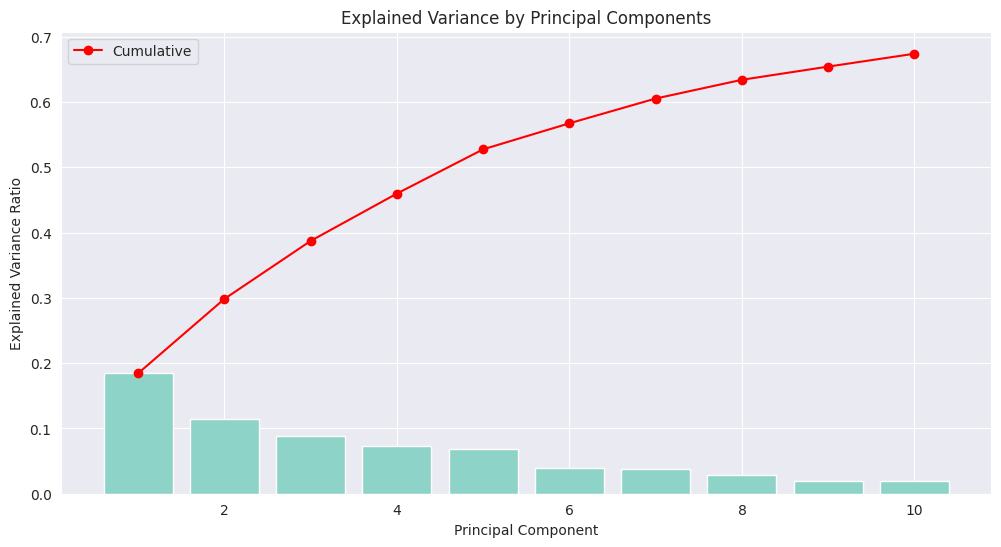

In [58]:
# Apply PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X)

# Calculate and plot explained variance for each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.bar(range(1, 11), explained_variance)
plt.plot(range(1, 11), np.cumsum(explained_variance), 'r-o', label='Cumulative')

# Customize plot
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)

# Show variance values
for i, v in enumerate(explained_variance):
    print(f'PC{i+1}: {v:.2%}')
print(f'Total variance explained: {sum(explained_variance):.2%}')

plt.show()